In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_df = pd.read_csv('train.csv',header=0)
test_df = pd.read_csv('test.csv',header=0)

In [5]:
len(train_df[train_df.Fare.isnull()]['Fare'])

0

In [7]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
train_df['Gender'] = train_df['Sex'].map({'female':0,'male':1})

In [9]:
test_df['Gender'] = test_df['Sex'].map({'female':0,'male':1})

In [16]:
len(train_df.Embarked[train_df.Embarked.isnull()])

2

In [27]:
if len(train_df.Embarked[train_df.Embarked.isnull()]):
    train_df.Embarked[train_df.Embarked.isnull()] = train_df.Embarked.dropna().mode().values

C:\Users\Director UYE\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [28]:
Port = list(enumerate(np.unique(train_df.Embarked)))

In [29]:
Port

[(0, 'C'), (1, 'Q'), (2, 'S')]

In [30]:
Ports = {name:i for i, name in Port}

In [31]:
Ports

{'C': 0, 'Q': 1, 'S': 2}

In [36]:
train_df['Embarked'] = train_df.Embarked.map(lambda x: Ports[x]).astype(int)

In [42]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,2,1


In [45]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,1,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,2,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,1,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,2,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,2,0


In [44]:
test_df.Embarked = test_df.Embarked.map(lambda x: Ports[x])

In [47]:
len(test_df[test_df.Fare.isnull()]['Fare'])

1

In [52]:
len(test_df.Age[test_df.Age.isnull()])

86

In [49]:
median_age = train_df.Age.dropna().median()

In [51]:
if len(train_df.Age[train_df.Age.isnull()]) > 0:
    train_df.loc[(train_df.Age.isnull()), 'Age'] = median_age

In [53]:
if len(test_df.Age[test_df.Age.isnull()]) > 0:
    test_df.loc[(test_df.Age.isnull()), 'Age'] = median_age

In [56]:
if len(test_df.Fare[test_df.Fare.isnull()]) > 0:
    median_fare = np.zeros(3)
    for i in range(0,3):
        median_fare[i] = test_df.Fare[test_df.Pclass == i+1].dropna().median()
    for j in range(0,3):
        test_df.loc[(test_df.Pclass == j+1) & (test_df.Fare.isnull()), 'Fare'] = median_fare[j]

In [57]:
Ids = test_df.PassengerId.values

In [59]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,2,1


In [61]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,1,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,2,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,1,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,2,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,2,0


In [63]:
len(test_df.Cabin[test_df.Cabin.isnull()])

327

In [70]:
train_df['FamilySize'] = train_df.SibSp + train_df.Parch

In [71]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,2,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,0,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,2,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,2,1,0


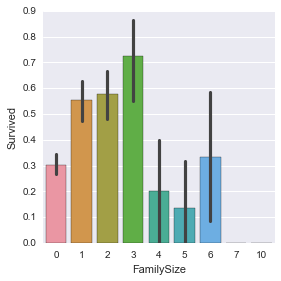

In [72]:
sns.factorplot(x = 'FamilySize', y = 'Survived', kind='bar', data=train_df)

In [79]:
train_df.dtypes[train_df.dtypes.map(lambda x: x == 'object')]

Name      object
Sex       object
Ticket    object
Cabin     object
dtype: object

In [80]:
train_df = train_df.drop(['Name','Sex','Ticket','Cabin','PassengerId'], axis=1)

In [82]:
test_df = test_df.drop(['Name','Sex','Ticket','Cabin','PassengerId'], axis=1)

In [83]:
train_df.head(1)

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Gender,FamilySize
0,0,3,22.0,1,0,7.25,2,1,1


In [86]:
test_df.head(1)

,Pclass,Age,SibSp,Parch,Fare,Embarked,Gender
0,3,34.5,0,0,7.8292,1,1


In [87]:
train_df = train_df.drop(['FamilySize'], axis =1)

In [88]:
train_data = train_df.values
test_data = test_df.values

In [89]:
import csv as csv
from sklearn.ensemble import RandomForestClassifier

In [91]:
forest = RandomForestClassifier(n_estimators=100)
forest = forest.fit(train_data[0::,1::], train_data[0::,0])

In [92]:
output = forest.predict(test_data).astype(int)

In [93]:
predictions_file = open('mysecondtryataforest.csv','wb')
open_file_object = csv.writer(predictions_file)
open_file_object.writerow(['PassengerId','Survived'])
open_file_object.writerows(zip(Ids,output))
predictions_file.close()
